In [154]:
import numpy as np
import pandas as pd
import fuzzywuzzy
import missingno as msng
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv('Netflix_dataset - Netflix_dataset.csv')

In [156]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [157]:
df.shape

(8807, 12)

In [158]:
df.notna().sum()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [159]:
for i in df.columns:
    print(i,":",df[i].unique(),"\n")

show_id : ['s1' 's2' 's3' ... 's8805' 's8806' 's8807'] 

type : ['Movie' 'TV Show'] 

title : ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan'] 

director : ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh'] 

cast : [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky K

In [160]:
for i in df.columns:
    print(i,":",df[i].nunique(),"\n")

show_id : 8807 

type : 2 

title : 8807 

director : 4528 

cast : 7692 

country : 748 

date_added : 1714 

release_year : 74 

rating : 17 

duration : 220 

listed_in : 514 

description : 8775 



In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [162]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} is numeric")
    elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
        print(f"{col} is categorical")

show_id is categorical
type is categorical
title is categorical
director is categorical
cast is categorical
country is categorical
date_added is categorical
release_year is numeric
rating is categorical
duration is categorical
listed_in is categorical
description is categorical


/tmp/ipykernel_7908/429679404.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


## Data Cleaning

In [163]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [164]:
df['director']

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [165]:
for col in df.columns:
    missing_value_percent=df[col].isnull().mean()*100
    print(df[col].name ,":-",missing_value_percent,"%")

show_id :- 0.0 %
type :- 0.0 %
title :- 0.0 %
director :- 29.908027705234474 %
cast :- 9.367548540933349 %
country :- 9.435676166685592 %
date_added :- 0.11354604292040424 %
release_year :- 0.0 %
rating :- 0.04541841716816169 %
duration :- 0.034063812876121265 %
listed_in :- 0.0 %
description :- 0.0 %


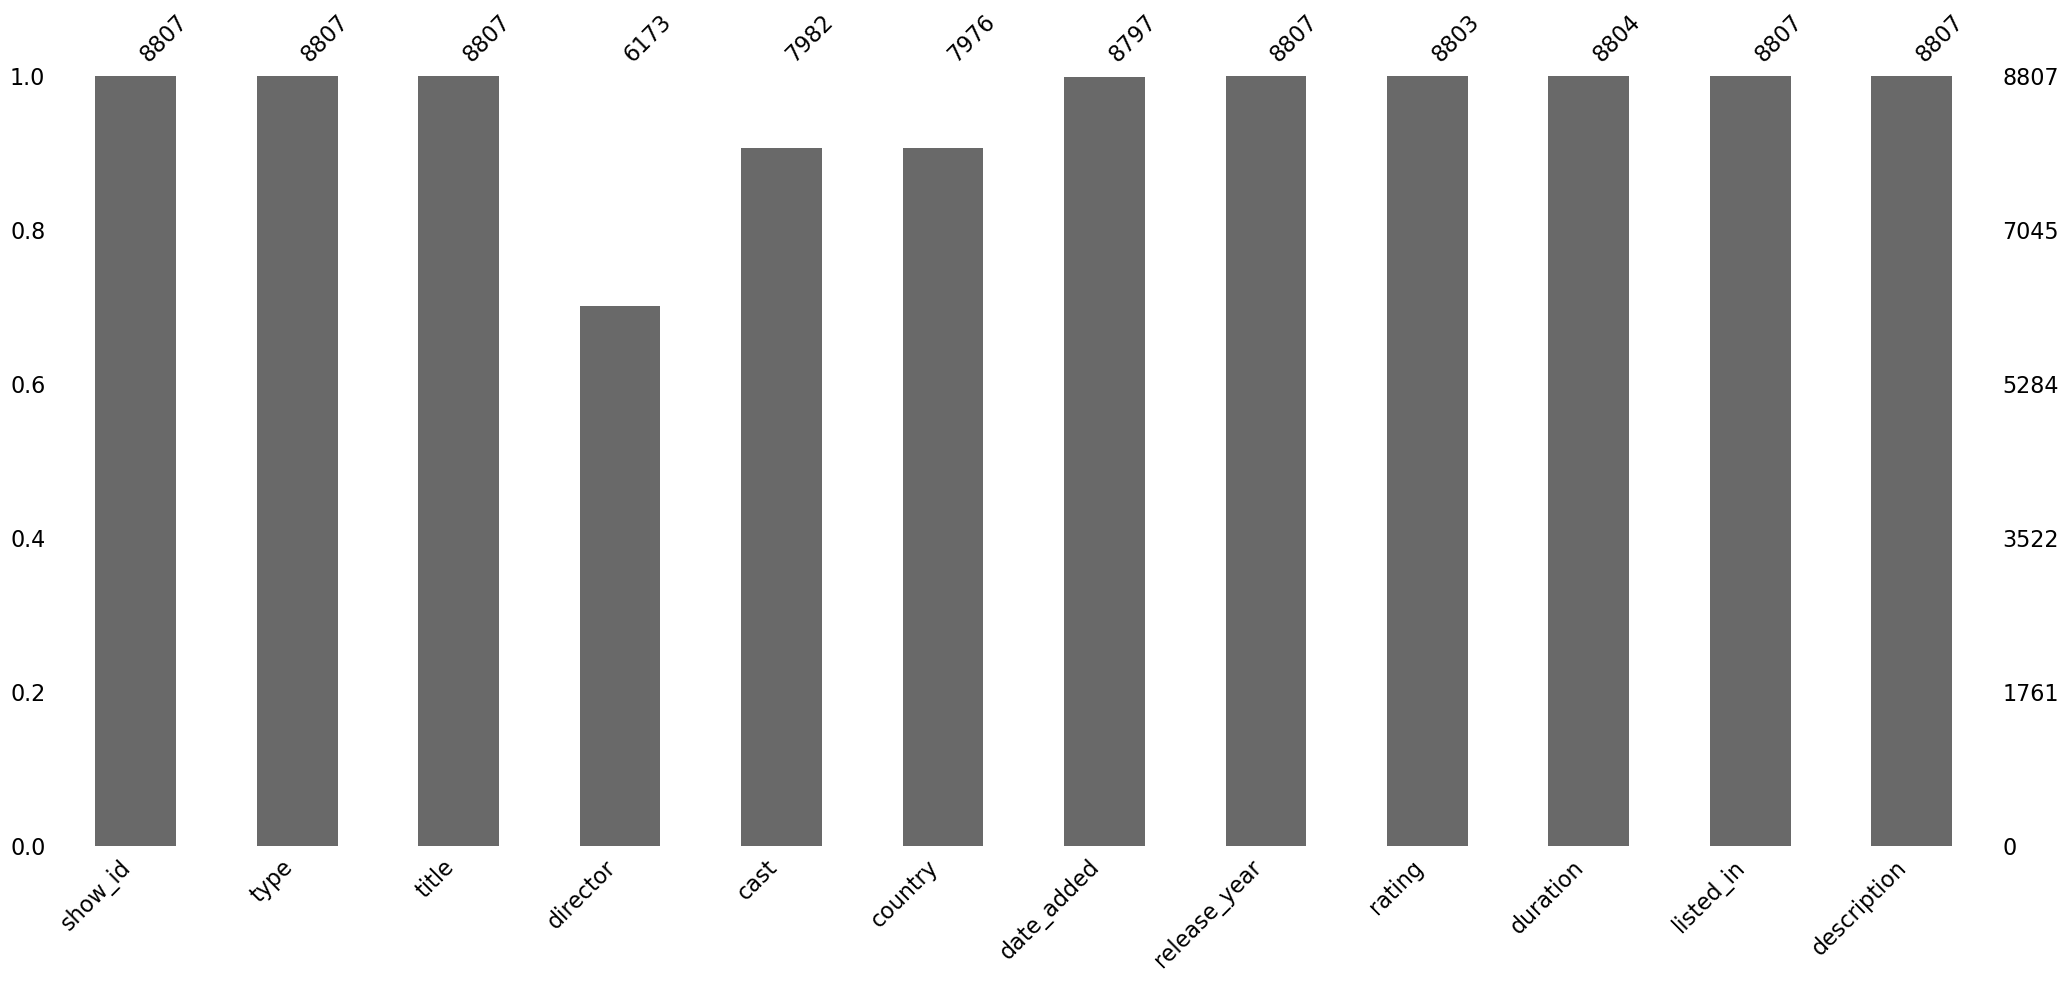

In [166]:
bar=msng.bar(df)

<Axes: >

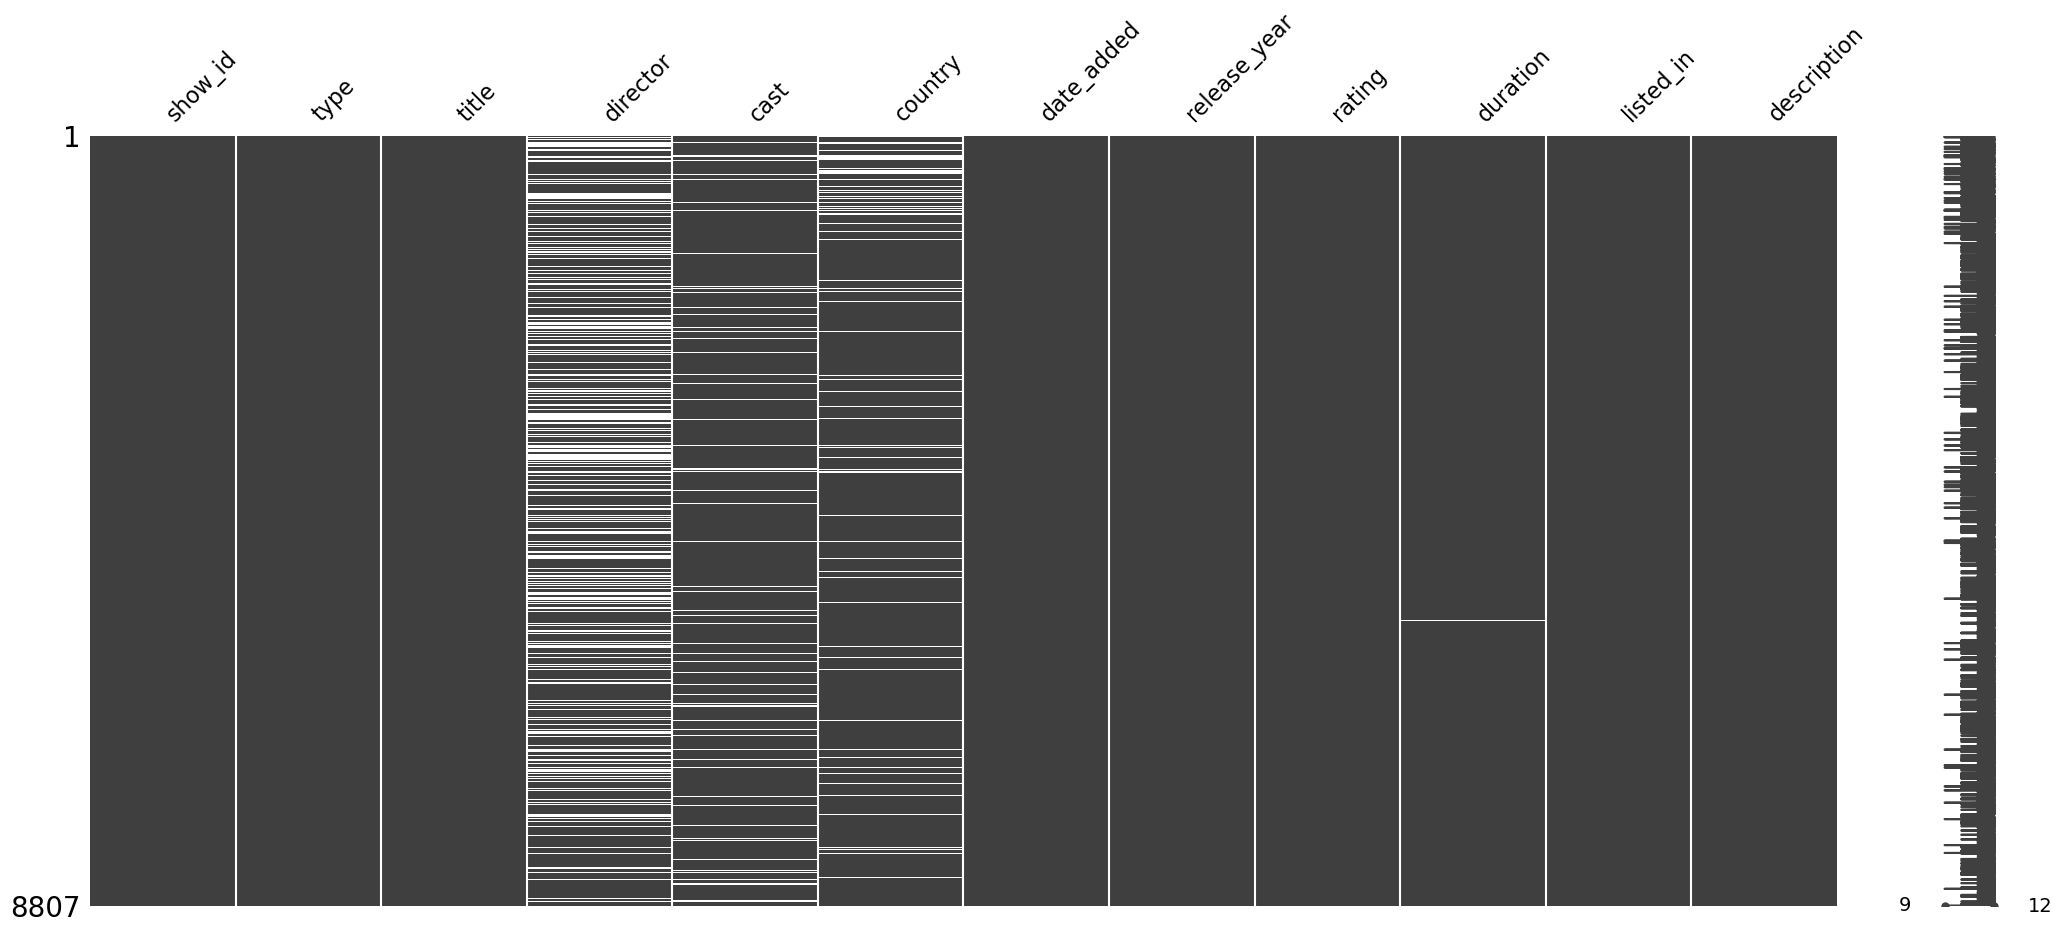

In [167]:
msng.matrix(df)

In [168]:
df.dropna(subset=['duration'],inplace=True)

In [169]:
df.dropna(subset=['date_added'],inplace=True)

In [170]:
df.dropna(subset=['rating'],inplace=True)

In [171]:
df[['director','country','cast']]

,director,country,cast
0,Kirsten Johnson,United States,NaN
1,NaN,South Africa,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Julien Leclercq,NaN,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN,NaN,NaN
4,NaN,India,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...,...
8802,David Fincher,United States,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN,NaN,NaN
8804,Ruben Fleischer,United States,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Peter Hewitt,United States,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [172]:
df['director'].mode()[0]

'Rajiv Chilaka'

In [173]:
df['director'].describe()

count              6169
unique             4526
top       Rajiv Chilaka
freq                 19
Name: director, dtype: object

In [174]:
df['title'].describe()

count                     8790
unique                    8790
top       Dick Johnson Is Dead
freq                         1
Name: title, dtype: object

As there is no repitition in movie / series titles. So, Imputing with modes can introduce Bias in machine learning model. So, it is better to impute Unknown to missing values

In [175]:
df[['director','country','cast']].fillna('Unknown')

,director,country,cast
0,Kirsten Johnson,United States,Unknown
1,Unknown,South Africa,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Julien Leclercq,Unknown,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Unknown,Unknown,Unknown
4,Unknown,India,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...,...
8802,David Fincher,United States,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,Unknown,Unknown,Unknown
8804,Ruben Fleischer,United States,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Peter Hewitt,United States,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [176]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [177]:
# UR doesn't makes any sense
df['rating'] = df['rating'].replace('UR', 'NR')

In [178]:
df['date_added']=pd.to_datetime(df['date_added'])

In [179]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [180]:
sorted_df=df.sort_values(by=['release_year'])

In [181]:
print("Oldest movie release date:",sorted_df.iloc[0].release_year)

Oldest movie release date: 1925


In [182]:
print("Oldest movie release date:",sorted_df.iloc[-1].release_year)

Oldest movie release date: 2021


In [183]:
df.groupby('type')['rating'].sum()

type
Movie      PG-13PGTV-MAPG-13TV-MATV-PGTV-MATV-14TV-PGTV-Y...
TV Show    TV-MATV-MATV-MATV-MATV-MATV-14TV-MATV-MATV-MAT...
Name: rating, dtype: object

In [184]:
df.groupby(['type', 'rating']).size()

type     rating  
Movie    G             41
         NC-17          3
         NR            78
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
TV Show  NR             4
         R              2
         TV-14        730
         TV-G          94
         TV-MA       1143
         TV-PG        321
         TV-Y         175
         TV-Y7        194
         TV-Y7-FV       1
dtype: int64

In [185]:
df.groupby(['type', 'director']).size().reset_index(name='count')

,type,director,count
0,Movie,A. L. Vijay,2
1,Movie,A. Raajdheep,1
2,Movie,A. Salaam,1
3,Movie,A.R. Murugadoss,2
4,Movie,Aadish Keluskar,1
...,...,...,...
4569,TV Show,Vijay S. Bhanushali,1
4570,TV Show,"Vikramaditya Motwane, Anurag Kashyap",1
4571,TV Show,Wouter Bouvijn,1
4572,TV Show,Yasuhiro Irie,1


## Visuals

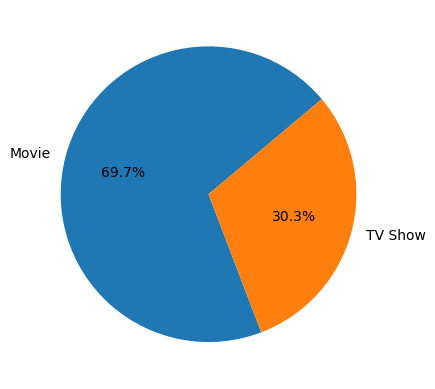

In [197]:
categories=df['type'].value_counts()
plt.pie(categories,labels=categories.index,startangle=40,autopct='%1.1f%%')
plt.show()

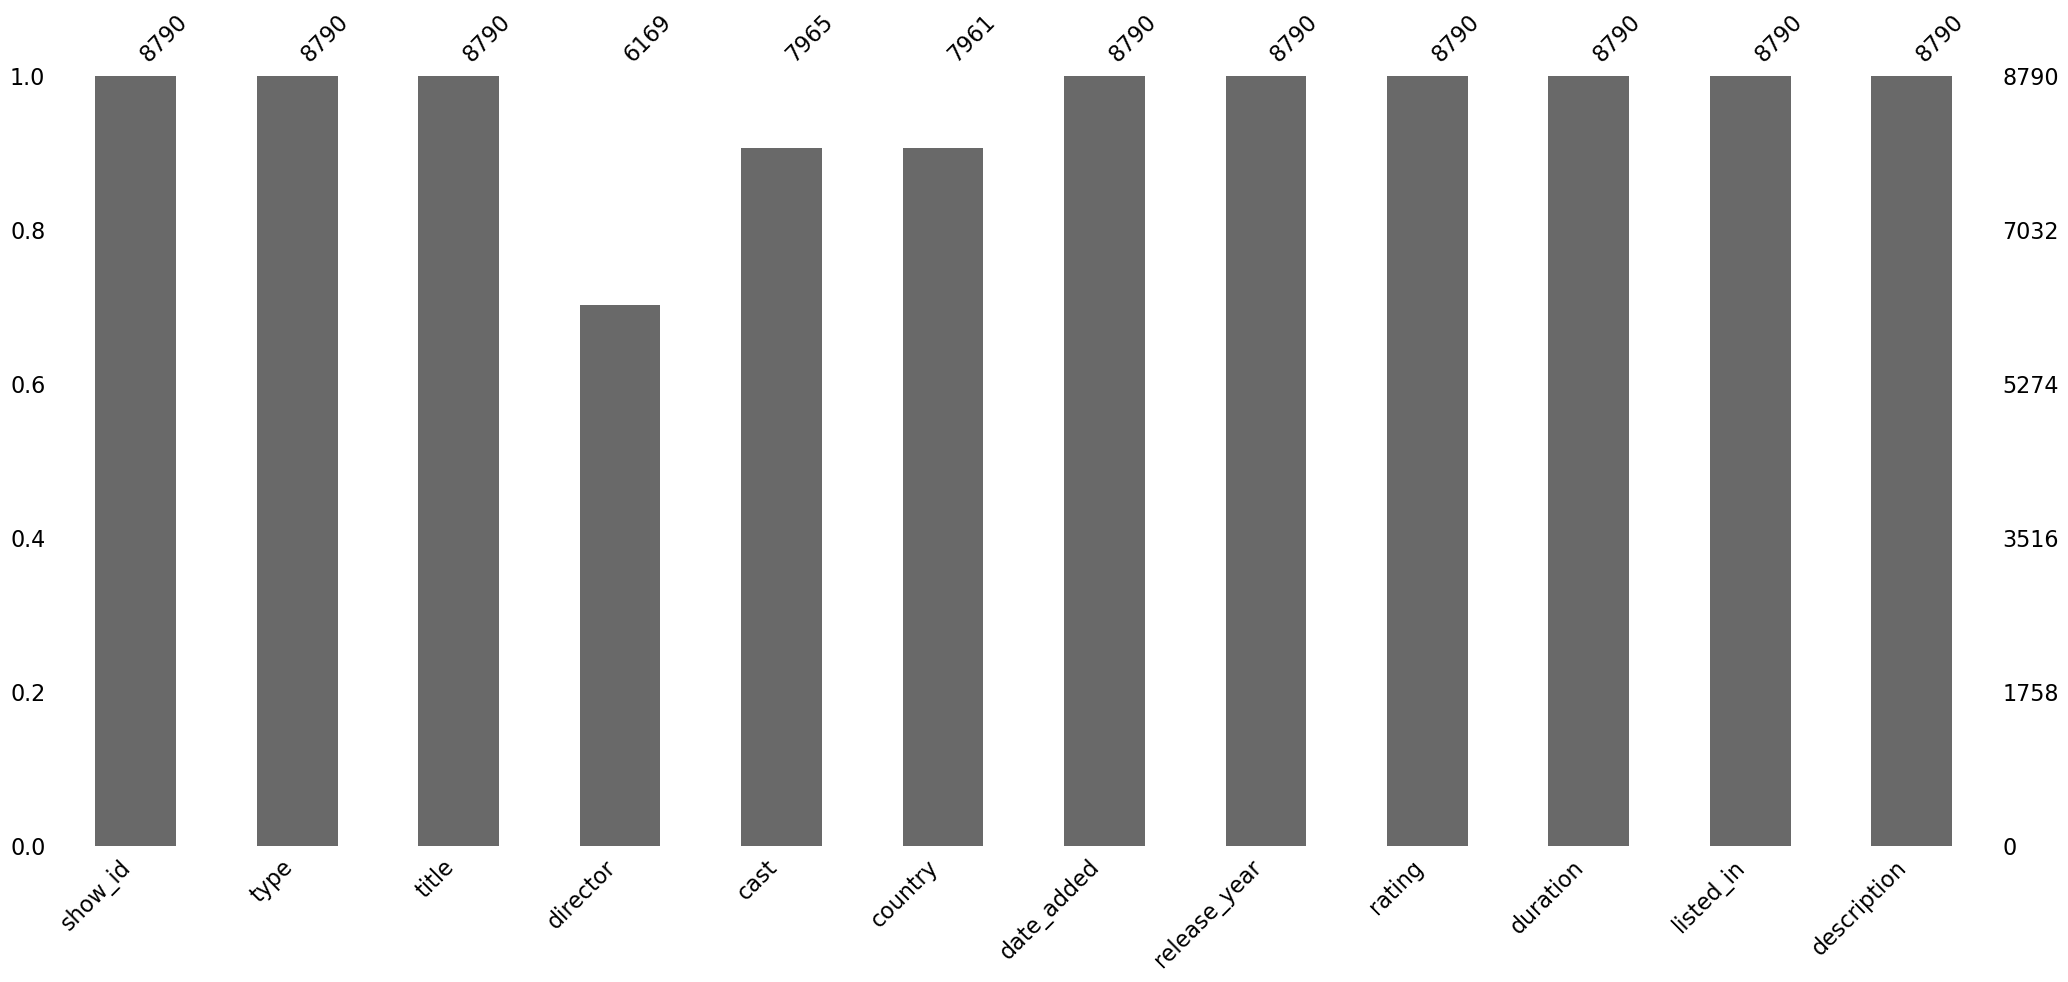

In [137]:
bar=msng.bar(df)

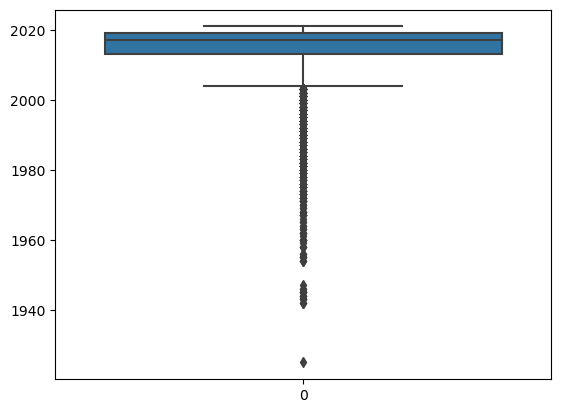

In [198]:
sns.boxplot(data=df['release_year'])
plt.show()